

1. What is a Support Vector Machine (SVM)?


-SVM is a supervised machine learning algorithm used for classification and regression.
It works by finding the best boundary (hyperplane) that separates data points of different classes with maximum margin.



2. Difference between Hard Margin and Soft Margin SVM


Hard Margin:
No misclassification allowed. Works only when data is perfectly separable.


Soft Margin:
Allows some misclassification to handle noisy data. Controlled by C parameter.

•In real life, we mostly use Soft Margin SVM.


3. Mathematical intuition behind SVM



-SVM tries to:
Maximize the distance (margin) between classes
While keeping classification errors minimum
•Best line with maximum safety gap

4. Role of Lagrange Multipliers in SVM


-They help convert a constrained optimization problem into an unconstrained one, making it easier to solve mathematically.


5. What are Support Vectors?


Support vectors are data points closest to the decision boundary.


They define the position of the hyperplane.


• Remove them - boundary changes.




6. What is Support Vector Classifier (SVC)?


-SVC is the classification version of SVM, used when the output is categorical (Yes/No, 0/1, etc.).




7. What is Support Vector Regressor (SVR)?


-SVR is the regression version of SVM, used when output is continuous (price, temperature, etc.).
It tries to fit data within a margin of tolerance (epsilon).



8. What is Kernel Trick?



Kernel trick helps SVM handle non-linear data by transforming it into a higher-dimensional space where it becomes linearly separable.



9. Compare Linear, Polynomial & RBF Kernel


Kernel-

•Linear

•Polynomial

•RBF


Use case-


•Linearly separable data.


•Curved boundaries.


•Complex & non-linear data.






10. Effect of C parameter in SVM



•Small C → larger margin, more errors allowed.


•Large C → smaller margin, fewer errors, risk of overfitting.






11. Role of Gamma in RBF Kernel



-Gamma controls how far the influence of a data point reaches.




Low gamma - smoother boundary

High gamma - complex boundary



12. What is Naive Bayes & why “Naive”?


-Naive Bayes is a probabilistic classifier based on Bayes’ Theorem.

It’s called Naive because it assumes features are independent, which is rarely true.


13. What is Bayes’ Theorem?



P(A|B) = [P(B|A) * P(A)] / P(B).

It calculates the probability of an event based on prior knowledge.



14. Gaussian vs Multinomial vs Bernoulli Naive Bayes

Type-

-Gaussian.

-Multinomial.

-Bernoulli.

Used for-

•Continuous data.

•Text / word counts.

•Binary features.



15. When to use Gaussian Naive Bayes?


-
When features follow a normal distribution.


16. Key assumptions of Naive Bayes


• Features are independent


• All features equally important



17. Advantages & Disadvantages of Naive Bayes


Advantages:

•Fast

•Works well on text data


Disadvantages:

•Independence assumption is unrealistic



18. Why Naive Bayes is good for text classification?



•Handles high-dimensional data.


•Works well with word frequencies.






19. Compare SVM and Naive


-SVM



 Pros:
•High accuracy.
•Works well with complex data.
•Effective in high dimensions.


 Cons:

•Slower on large datasets
•Needs careful tuning of parameters (C, gamma)

NAIVE -


Pros:

•Very fast
•Works extremely well for text •classification
Requires less training data

Cons:

•Independence assumption is unrealistic
•Lower accuracy on complex datasets



20. How Laplace Smoothing helps?



-Prevents zero probability for unseen data by adding a small value.

21. SVM Classifier on Iris

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


22. Linear vs RBF Kernel

In [ ]:
for kernel in ['linear', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    print(kernel, accuracy_score(y_test, model.predict(X_test)))

linear 1.0
rbf 0.9666666666666667


23. SVR with MSE

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = load_diabetes(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (mandatory for SVR)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVR
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

Mean Squared Error (MSE): 4332.738479345717


24. Polynomial Kernel Visualization

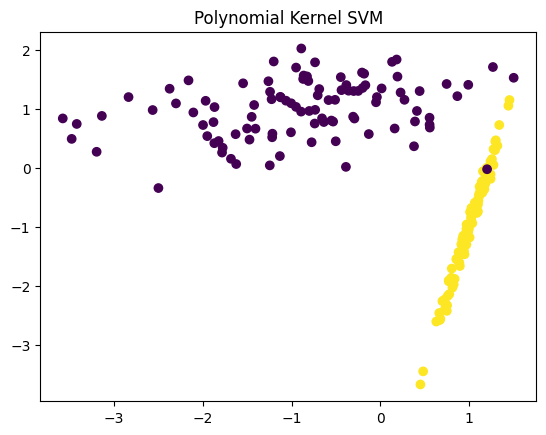

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_samples=200, n_features=2,
                           n_redundant=0, n_clusters_per_class=1)

model = SVC(kernel='poly', degree=3)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Polynomial Kernel SVM")
plt.show()

25. Gaussian NB – Breast Cancer

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = GaussianNB()
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.9210526315789473


26. Multinomial NB – Text Classification

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load small subset (prevents errors)
data = fetch_20newsgroups(
    subset='train',
    categories=['sci.space', 'rec.autos'],
    remove=('headers', 'footers', 'quotes')
)

# Convert text to numbers
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.data)
y = data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5975967
  warnings.warn(f"Retry downloading from url: {remote.url}")


HTTPError: HTTP Error 403: Forbidden

27. Different C Values

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

for c in [0.1, 1, 10]:
    model = SVC(C=c)
    model.fit(X_train, y_train)
    print("C =", c, "Accuracy =", accuracy_score(y_test, model.predict(X_test)))

C = 0.1 Accuracy = 0.9736842105263158
C = 1 Accuracy = 0.9736842105263158
C = 10 Accuracy = 1.0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

for c in [0.1, 1, 10]:
    model = SVC(C=c)
    model.fit(X_train, y_train)
    print("C =", c, "Accuracy =", accuracy_score(y_test, model.predict(X_test)))

C = 0.1 Accuracy = 0.868421052631579
C = 1 Accuracy = 0.9210526315789473
C = 10 Accuracy = 0.9473684210526315


28. Bernoulli NB

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
model.fit(X_train, y_train)

print("Accuracy after scaling:", accuracy_score(y_test, model.predict(X_test)))

Accuracy after scaling: 0.9736842105263158


29. Feature Scaling + SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
model.fit(X_train, y_train)

print("Accuracy after scaling:", accuracy_score(y_test, model.predict(X_test)))

Accuracy after scaling: 0.9473684210526315


30. Laplace Smoothing

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Re-load Iris data without scaling for MultinomialNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model_no_smooth = MultinomialNB(alpha=1e-10)
model_smooth = MultinomialNB(alpha=1)

model_no_smooth.fit(X_train, y_train)
model_smooth.fit(X_train, y_train)

print("Before smoothing:", accuracy_score(y_test, model_no_smooth.predict(X_test)))
print("After smoothing:", accuracy_score(y_test, model_smooth.predict(X_test)))

Before smoothing: 0.9473684210526315
After smoothing: 0.9473684210526315


31. GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.1, 1, 10], 'gamma': [0.1, 1]}
grid = GridSearchCV(SVC(), params)

grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 1, 'gamma': 1}


32. Imbalanced Dataset

In [ ]:
model = SVC(class_weight='balanced')
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.9473684210526315


33. Spam Detection (NB)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.9473684210526315


34. SVM vs NB Comparison

In [ ]:
svm = SVC()
nb = GaussianNB()

svm.fit(X_train, y_train)
nb.fit(X_train, y_train)

print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test)))
print("NB Accuracy:", accuracy_score(y_test, nb.predict(X_test)))

SVM Accuracy: 0.9473684210526315
NB Accuracy: 0.9473684210526315


35. Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

model = MultinomialNB()
model.fit(X_new, y)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(


MultinomialNB()

36. OvR vs OvO

In [ ]:
ovr = SVC(decision_function_shape='ovr')
ovo = SVC(decision_function_shape='ovo')

ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

print("OvR Accuracy:", accuracy_score(y_test, ovr.predict(X_test)))
print("OvO Accuracy:", accuracy_score(y_test, ovo.predict(X_test)))

OvR Accuracy: 0.9473684210526315
OvO Accuracy: 0.9473684210526315


37. Kernel Comparison

In [ ]:
for k in ['linear', 'poly', 'rbf']:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    print(k, accuracy_score(y_test, model.predict(X_test)))

linear 0.9736842105263158
poly 0.8947368421052632
rbf 0.9473684210526315


38. K-Fold CV

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(SVC(), X, y, cv=cv)

print("Average Accuracy:", scores.mean())

Average Accuracy: 0.9666666666666666


39. Different Priors

In [ ]:
model = GaussianNB(priors=[0.3, 0.3, 0.4]) # Example priors for 3 classes
model.fit(X_train, y_train)

GaussianNB(priors=[0.3, 0.3, 0.4])

40. RFE

In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(SVC(kernel='linear'), n_features_to_select=5)
selector.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


RFE(estimator=SVC(kernel='linear'), n_features_to_select=5)

41. Precision, Recall, F1

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      0.92      0.92        12
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



42. Log Loss

In [ ]:
from sklearn.metrics import log_loss

model = GaussianNB()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, probs))

Log Loss: 0.0512933571455935


43. Confusion Matrix

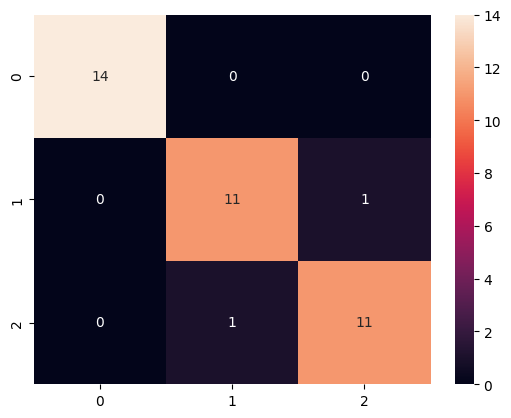

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

44. MAE for SVR

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Load dataset
X, y = load_diabetes(return_X_y=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVR
model = SVR()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# MAE
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 56.0294733040062


45. ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score

model = SVC(probability=True)
model.fit(X_train, y_train)

# For multiclass ROC-AUC, we need probabilities for all classes
probs = model.predict_proba(X_test)
# Use multi_class='ovr' and average='weighted' for multiclass ROC-AUC
print("ROC-AUC:", roc_auc_score(y_test, probs, multi_class='ovr', average='weighted'))

ROC-AUC: 0.993927125506073


46. Precision-Recall Curve

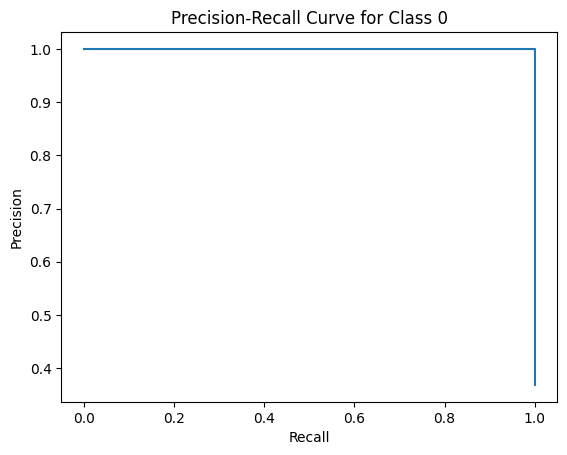

In [ ]:
from sklearn.metrics import precision_recall_curve

# Choose one class as the positive class (e.g., class 0)
y_test_binary_class0 = (y_test == 0).astype(int)
probs_class0 = model.predict_proba(X_test)[:, 0]

precision, recall, _ = precision_recall_curve(y_test_binary_class0, probs_class0)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Class 0")
plt.show()